In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import numpy as np
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [3]:
X = np.array([
#    0  1  2  3  4  5  6  7  8
    [0, 1, 1, 0, 0, 1, 1, 0, 0], # 3
    [1, 0, 0, 1, 0, 1, 0, 1, 0], # 4
    [1, 1, 0, 0, 0, 1, 0, 1, 1], # 5
    [1, 1, 1, 1, 1, 1, 1, 1, 1]  # 8
])

In [4]:
y = np.array([
    [1,0,0,0], # 1
    [0,1,0,0], # 2
    [0,0,1,0], # 3
    [0,0,0,1]  # etc
])

In [5]:
def create_model():
    d_model = models.Sequential()

    d_model.add(layers.Input(shape=(9,)))
    d_model.add(layers.Dense(16, activation='relu'))
    d_model.add(layers.Dense(8, activation='relu'))
    d_model.add(layers.Dense(4, activation='softmax'))

    d_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return d_model

In [6]:
target_mse = 0.01
final_loss = 1.0
all_losses = []
n_epochs = 100

c_model = create_model()

while final_loss > target_mse:
    history = c_model.fit(X, y, epochs=n_epochs, verbose=0)
    final_loss = history.history['loss'][-1]
    all_losses = history.history['loss']
    print(f"Epochs: {n_epochs}    MSE: {final_loss:.4f}")
    n_epochs += 100

I0000 00:00:1757432966.554460   21261 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9593 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1757432967.839196   21346 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epochs: 100    MSE: 0.1335
Epochs: 200    MSE: 0.0353
Epochs: 300    MSE: 0.0017


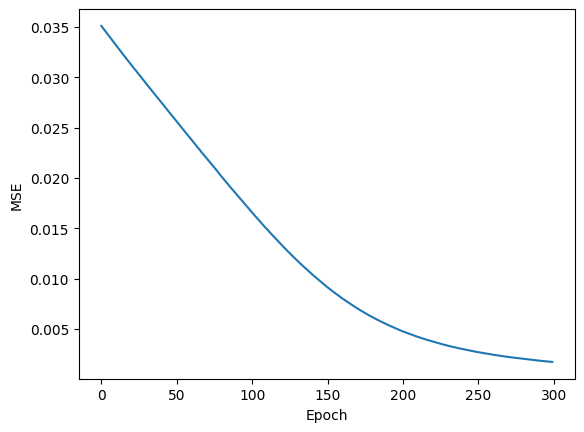

In [7]:
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [8]:
predictions = c_model.predict(X)

print("Очікувані")
print(y)

print("\nОтримані")
print(np.round(predictions, 2))  # rounded for readability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Очікувані
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Отримані
[[0.9  0.01 0.01 0.08]
 [0.01 0.96 0.03 0.01]
 [0.01 0.02 0.95 0.03]
 [0.03 0.   0.01 0.95]]
